In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**In this exercise we are going to predict whether microchips from a fabrication plant passes quality assurance**

In [2]:
data = pd.read_csv('ex2data2.txt', header=None, names=[
                   'Test 1', 'Test 2', 'Accepted'])

data_1_o = data.loc[data['Accepted'] == 1]
data_0 = data.loc[data['Accepted'] == 0]
Y_mat = np.asanyarray(data[['Accepted']])

**Visualize the data, we see that we cannot separate the data by a straight line**

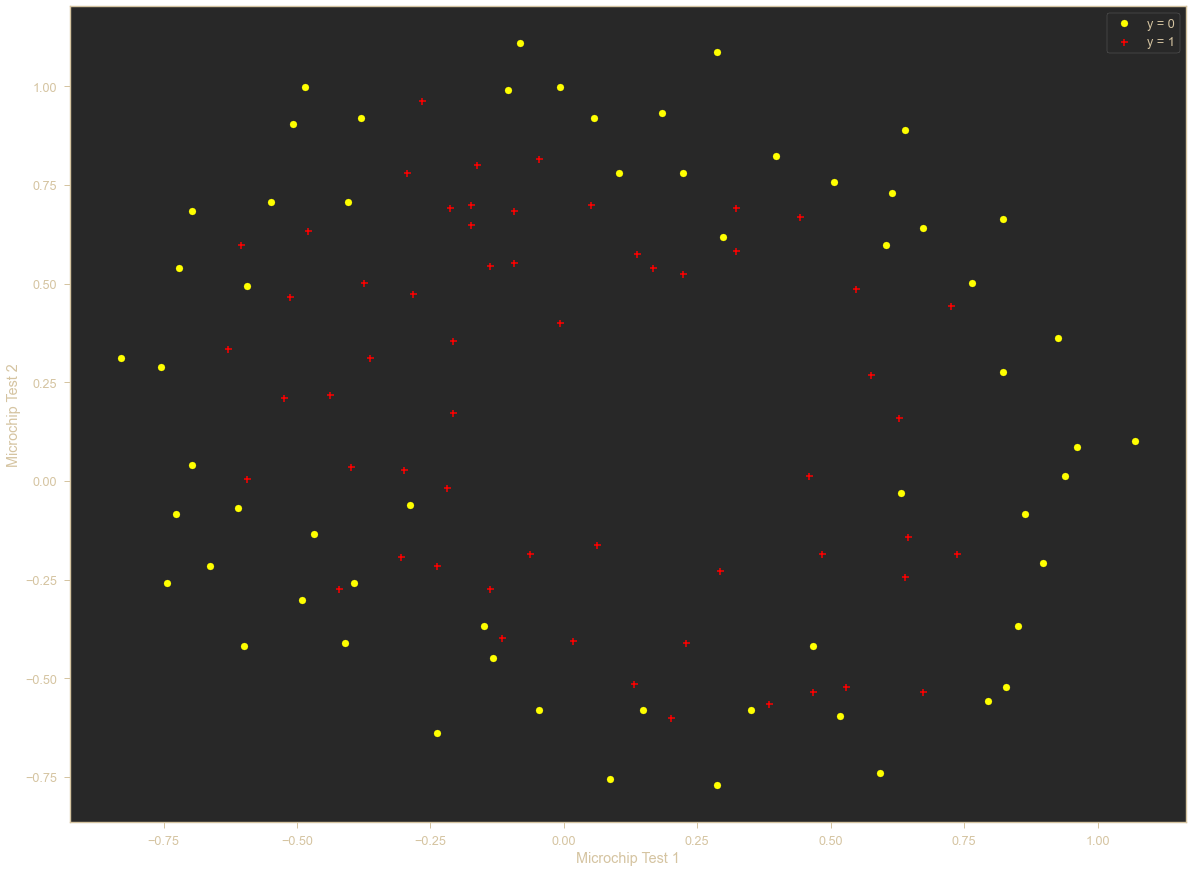

In [3]:
plt.figure(figsize=(20, 15))
plt.scatter(data_0['Test 1'], data_0['Test 2'], c='Yellow')
plt.scatter(data_1_o['Test 1'], data_1_o['Test 2'], marker='+', c='Red')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 0', 'y = 1'])
plt.show()

**We need to map features to polynomial**

In [4]:
m = data.shape[0]
data_1 = data['Test 1'].to_numpy().reshape(m, 1)
data_2 = data['Test 2'].to_numpy().reshape(m, 1)

In [5]:
def mapfeatures(degree, x1, x2):
    out = np.ones((m, 1))
    for i in range(1, degree+1):
        for j in range(i+1):
            output = (x1 ** (i-j)) * (x2 ** j)
            out = np.hstack((out, output))
    return out

**After Mapping our features are as follow**
$$\begin{bmatrix} 1 & x_{1} & x_{2} & x_{1}^2 & x_{1}x_{2} & x_{2}^2 & x_{1}^3 & x_{1}^2x_{2} & x_{1}x_{2}^2 & x_{2}^3 
& x_{1}^4 & x_{1}^3x_{2} & x_{1}^2x_{2}^2 & x_{1}x_{2}^3 & x_{2}^4 & x_{1}^5 & x_{1}^4x_{2} & x_{1}^3x_{2}^2 & x_{1}^2x_2^3
& x_{1}x_2^4 & x_2^5 & x_1^6 & x_1^5x_2 & x_1^4x_2^2 & x_1^3x_2^3 & x_1^2x_2^4 & x_1x_2^5 & x_2^6\end{bmatrix}$$

In [6]:
X_map = mapfeatures(6, data_1, data_2)

Regularized cost function in logistic regression:
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)}log(h_\theta (x^{(i)})) - (1-y^{(i)})log(1 - h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$$ <br>
We do not penalize $\theta_0$<br> Gradient of cost function:<br> $$\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$<br> for j = 0$$(\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}) + \frac{\lambda}{m}\theta_j$$ for j >= 1

In [7]:
def Sigmoid(z):
    z = 1/(1 + np.exp(-z))
    return z

In [8]:
# Initialize parameters
theta_size = X_map.shape[1]
initial_theta = np.zeros((theta_size, 1))
Lambda = 1

In [9]:
def costFunctionReg(initial_theta,x,y,Lambda,m):
    J = 1/m * ((-y.T @ np.log(Sigmoid(x @ initial_theta))) - ((1 - y).T @ np.log(1 - Sigmoid(x @ initial_theta)))) + Lambda/(2*m) * np.sum(initial_theta[1:] ** 2)
    gradient_0 = 1/m * np.sum((Sigmoid(x @ initial_theta) - y))
    gradient_1 = 1/m * (x.T @ (Sigmoid(x @ initial_theta) - y))[1:] + Lambda/m * initial_theta[1:]
    gradient_tot = np.vstack((gradient_0, gradient_1))
    return J[0][0], gradient_tot

In [10]:
cost, grad = costFunctionReg(initial_theta, X_map, Y_mat, Lambda, m)
print('Cost for initial_theta is:', cost)
print('Gradient for initial_theta is:\n', grad[0:5])

Cost for initial_theta is: 0.6931471805599453
Gradient for initial_theta is:
 [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [11]:
# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones((theta_size, 1))
cost_test, grad_test = costFunctionReg(test_theta, X_map, Y_mat, 10, m)
print('Cost for test_theta is:', cost_test)
print('Gradient for test_theta is:\n', grad_test[0:5])

Cost for test_theta is: 3.16450933161501
Gradient for test_theta is:
 [[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


**I am going to use GradientDescent instead of fminunc function to optimize theta**

Refer here (Python way) __[fminunc](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)__

In [12]:
def GradientDescent(x, y, theta, alpha, num_iters, Lambda):
    m = len(y)
    J_hist = []
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta, x, y, Lambda, m)
        # update theta by gradient descent
        theta = (theta - alpha*grad)
        J_hist.append(cost)
    return theta, J_hist

In [13]:
theta, J_hist = GradientDescent(X_map, Y_mat, initial_theta, 1, 800, 0.2)
print('The regularized theta using ridge regression \n', theta)

The regularized theta using ridge regression 
 [[ 2.25319932]
 [ 1.44552306]
 [ 2.33283911]
 [-3.57008233]
 [-2.35002884]
 [-3.07090829]
 [ 0.50119267]
 [-0.88407626]
 [-0.69606495]
 [-0.22204243]
 [-2.69560917]
 [ 0.04161168]
 [-1.31573798]
 [-0.80286232]
 [-2.23101395]
 [-0.39638083]
 [-0.43758167]
 [ 0.09476652]
 [-0.69300577]
 [-0.78996079]
 [-0.45416815]
 [-2.01051679]
 [ 0.16446857]
 [-0.59855483]
 [ 0.11471778]
 [-0.73960173]
 [-0.52044034]
 [-1.38532427]]


**Note that alpha, num_iters and lambda were not given so we try a few combinations and come up with the best**

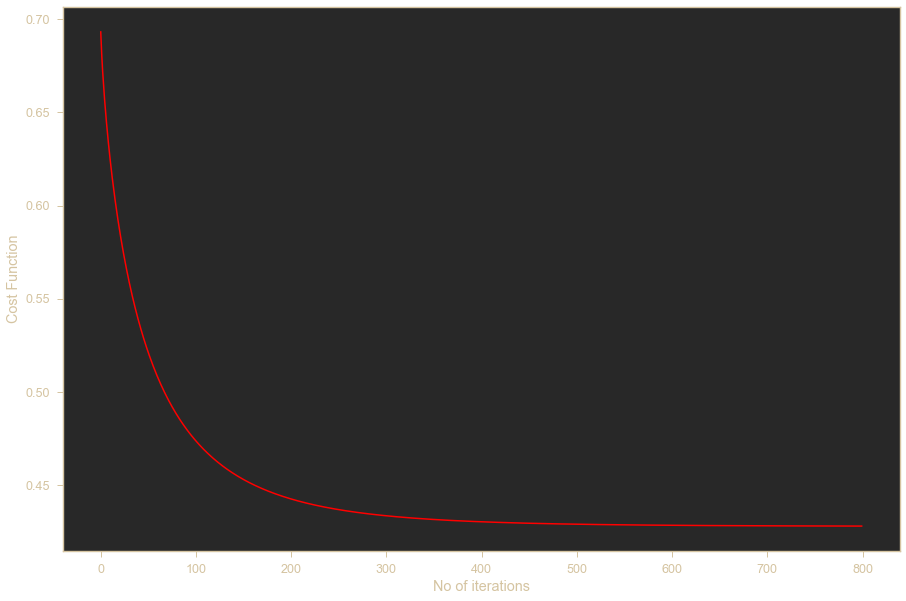

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(J_hist, color = 'Red')
plt.xlabel('No of iterations')
plt.ylabel('Cost Function')
plt.show()

In [15]:
def mapFeaturePlot(x1, x2, degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            terms = (x1**(i-j) * x2**j)
            out = np.hstack((out, terms))
    return out

In [16]:
u_values = np.linspace(-1, 1.5, num=50)
v_values = np.linspace(-1, 1.5, num=50)
z = np.zeros((len(u_values), len(v_values)))
# We evaluate z = theta * x over the grid
for i in range(len(u_values)):
    for j in range(len(v_values)):
        z[i, j] = mapFeaturePlot(u_values[i], v_values[j], 6) @ theta

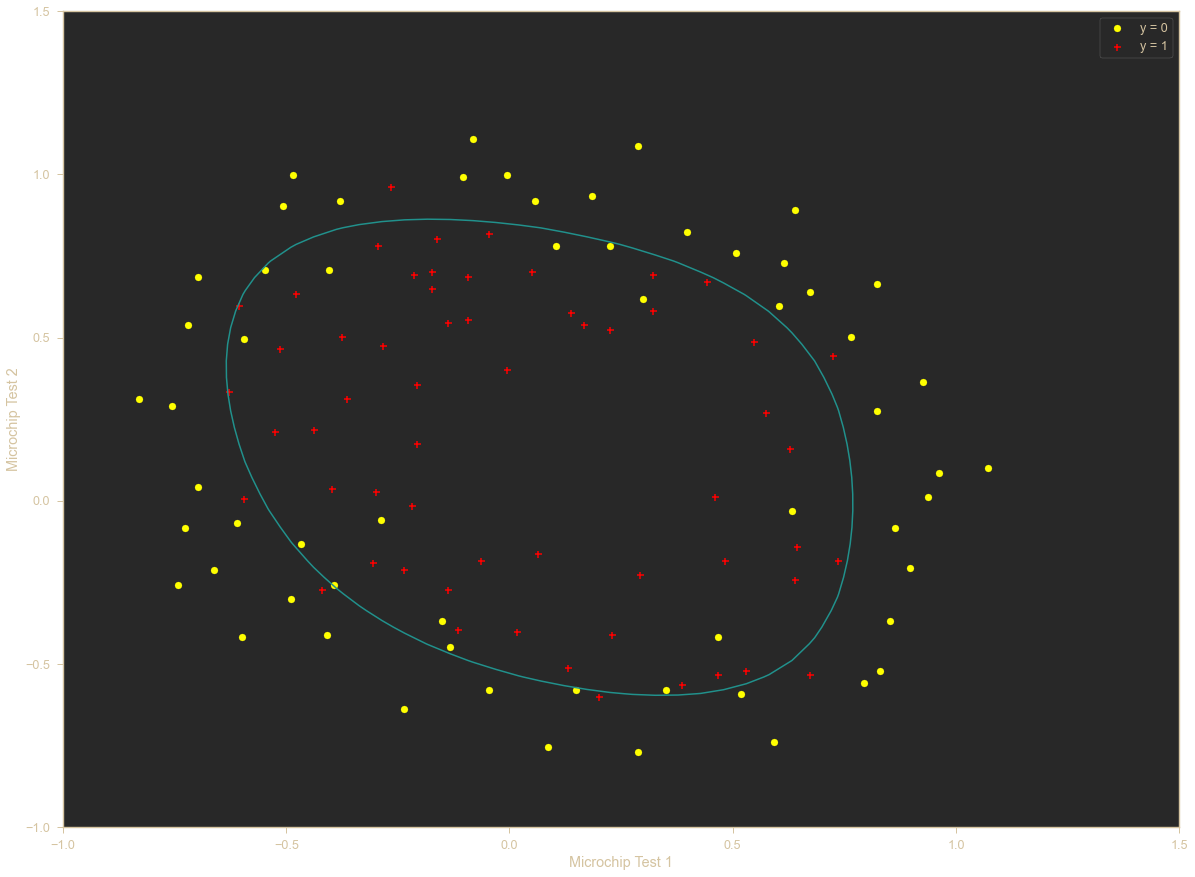

In [17]:
plt.figure(figsize=(20, 15))
plt.scatter(data_0['Test 1'], data_0['Test 2'], c='Yellow')
plt.scatter(data_1_o['Test 1'], data_1_o['Test 2'], marker='+', c='Red')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 0', 'y = 1'])
plt.contour(u_values, v_values, z.T, 0)
plt.show()

In [18]:
def classifierPredict(theta, X):

    predictions = X @ theta

    return predictions > 0


p = classifierPredict(theta, X_map)
print("Train Accuracy:", (sum(p == Y_mat)[0]/len(Y_mat)) * 100, "%")

Train Accuracy: 83.05084745762711 %
